# Get Data
The following code block allows a user to get data files and utility scripts beginning with only main.ipynb either locally or on Google Colab.

In [1]:
import os.path
from os import path
try:
    __import__("wget")
    import wget
    print("wget import exists")
    if(not path.exists("data")):
        print("Making Directory data")
        os.mkdir("data")   
    if(not path.exists("data/control.xls")):
        print("Downloading control.xls")
        wget.download("https://raw.githubusercontent.com/smithandrewk/sleep/main/data/control.xls","data/control.xls")
    if(not path.exists("data/deprivation.xls")):
        print("Downloading deprivation.xls")
        wget.download("https://raw.githubusercontent.com/smithandrewk/sleep/main/data/deprivation.xls","data/deprivation.xls")
    if(not path.exists("scripts")):
        print("Making Directory scripts")
        os.mkdir("scripts")   
    if(not path.exists("scripts/utils.py")):
        print("Downloading utils.py")
        wget.download("https://raw.githubusercontent.com/smithandrewk/sleep/main/scripts/utils.py","scripts/utils.py")
except ImportError:
    print("wget import does not exist, using python2.7 wget")
    if(not path.exists("data")):
        print("Making Directory data")
        !mkdir data   
    if(not path.exists("data/control.xls")):
        print("control.xls not in data")
        !wget -O data/control.xls https://raw.githubusercontent.com/smithandrewk/sleep/main/data/control.xls
    if(not path.exists("data/deprivation.xls")):
        print("deprivation.xls not in data")
        !wget -O data/deprivation.xls https://raw.githubusercontent.com/smithandrewk/sleep/main/data/deprivation.xls
    if(not path.exists("scripts")):
        print("Making Directory scripts")
        !mkdir scripts
    if(not path.exists("scripts/utils.py")):
        !wget -O scripts/utils.py https://raw.githubusercontent.com/smithandrewk/sleep/main/scripts/utils.py

wget import exists


In [2]:
from scripts.utils import *
df = preprocess("control")
## Statistics
# df.describe() # nice for obtaining statistics over dataframe
p,s,w = np.bincount(df['Class'])
total = p + s + w
print('Examples:\n    Total: {}\n    P: {} ({:.2f}% of total)\n    S: {} ({:.2f}% of total)\n    W: {} ({:.2f}% of total)\n'.format(
    total, p, 100 * p / total,s,100 * s / total,w,100 * w / total))

Examples:
    Total: 8641
    P: 367 (4.25% of total)
    S: 3965 (45.89% of total)
    W: 4309 (49.87% of total)



In [3]:
ps = df.loc[df["Class"]==0]
ss = df.loc[df["Class"]==1]
ws = df.loc[df["Class"]==2]
ps_lcm = np.lcm(p,s)
lcm = np.lcm(ps_lcm,w)
lcm

6270262895

In [4]:
w/p
for i in range(11):
  df = pd.concat([df,ps])
df

,Class,0-0.5,0.5-1,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,...,16-16.5,16.5-17,17-17.5,17.5-18,18-18.5,18.5-19,19-19.5,19.5-20,Activity,EEG 2
1,2,24.586045,55.131697,78.506117,52.740326,58.563386,14.552035,26.364280,21.642888,37.597922,...,1.330372,2.701623,2.032272,2.481273,2.769557,2.156247,2.940888,3.470576,0.100994,-6.294846
2,2,37.074691,128.947192,24.519845,39.892634,27.384148,37.036906,26.095708,26.226684,39.873118,...,1.971869,3.658804,3.343531,1.425610,4.532924,2.431444,3.888520,1.921557,0.200995,-2.346836
3,2,54.415625,115.325207,86.279811,79.842617,41.354535,57.572824,29.798652,27.533800,12.925224,...,3.819550,2.731836,4.763795,1.898447,2.378209,2.500515,3.305095,2.035448,0.501000,0.920145
4,2,1.027493,2.622392,8.170351,1.964630,5.602924,1.842355,5.649830,3.664765,3.457500,...,0.478062,0.182575,0.981841,0.268720,0.039398,0.081701,0.060758,0.125317,1.101009,0.000000
5,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200995,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8307,0,58.509531,24.130297,77.456597,119.575308,21.386708,25.598958,61.105373,22.656495,24.167232,...,3.931479,1.968162,3.062893,1.562262,2.931484,2.914780,2.472442,4.033660,0.000992,2.001416
8308,0,18.844414,60.880904,42.080082,99.809994,60.119598,74.158525,45.799685,43.245535,37.006743,...,1.771997,2.485157,3.483579,3.607862,3.197097,2.469661,2.292118,2.642321,0.100994,0.160058
8309,0,55.335973,20.153225,46.843079,63.216221,57.758503,32.045904,27.292346,17.916218,16.484902,...,3.273334,2.513552,2.625054,1.996016,2.268182,3.123659,3.243166,4.084404,0.000992,1.970815
8310,0,28.903322,21.978773,34.023285,69.517689,42.079554,68.849285,72.357107,43.558518,33.260433,...,2.236040,2.790370,2.339984,2.798732,3.253075,6.331714,1.341946,2.979213,0.000992,0.134202


In [5]:
p,s,w = np.bincount(df['Class'])
total = p + s + w
print('Examples:\n    Total: {}\n    P: {} ({:.2f}% of total)\n    S: {} ({:.2f}% of total)\n    W: {} ({:.2f}% of total)\n'.format(
    total, p, 100 * p / total,s,100 * s / total,w,100 * w / total))

Examples:
    Total: 12678
    P: 4404 (34.74% of total)
    S: 3965 (31.27% of total)
    W: 4309 (33.99% of total)



In [6]:
import sklearn
from sklearn.model_selection import train_test_split
df = pd.read_csv("data/control_preprocessed.csv")

# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(df, test_size=0.2)
# train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
p_train_labels = train_labels == 0
s_train_labels = train_labels == 1
w_train_labels = train_labels == 2

# val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
# val_features = np.array(val_df)
test_features = np.array(test_df)

In [8]:
def train(hln):
    model = get_compiled_model(hln,INPUT_FEATURES=(train_features.shape[-1],),dropout=True)
    """
    We one-hot encode the targets. Mathematically, this is good for calculating
    loss. CategoricalCrossEntropy simplifies to a negative log when targets are
    one-hot encoded. However, I simply recieved an error from model.fit when I 
    did not one-hot encode.
      @y : targets
      @depth : number of targets
    """
    baseline_history = model.fit(
        train_features,
        tf.one_hot(train_labels,depth=3),
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        callbacks=[early_stopping])
    train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
    test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
    baseline_results = model.evaluate(test_features, tf.one_hot(test_labels,depth=3),
                                      batch_size=BATCH_SIZE, verbose=0)
    plot_cm(tf.one_hot(test_labels,depth=3).numpy().argmax(axis=1), test_predictions_baseline.argmax(axis=1),baseline_results,hln)
    plt.savefig(str(hln),bbox_inches='tight')

Epoch 1/100
35/35 [==============================] - 0s 1ms/step - loss: 49.8821 - accuracy: 0.3296
Epoch 2/100
35/35 [==============================] - 0s 990us/step - loss: 21.5100 - accuracy: 0.3641
Epoch 3/100
35/35 [==============================] - 0s 828us/step - loss: 9.6430 - accuracy: 0.4282
Epoch 4/100
35/35 [==============================] - 0s 886us/step - loss: 12.8476 - accuracy: 0.4439
Epoch 5/100
35/35 [==============================] - 0s 953us/step - loss: 8.7895 - accuracy: 0.4312
Epoch 6/100
35/35 [==============================] - 0s 773us/step - loss: 8.5870 - accuracy: 0.4537
Epoch 7/100
35/35 [==============================] - 0s 974us/step - loss: 17.1236 - accuracy: 0.5122
Epoch 8/100
35/35 [==============================] - 0s 1ms/step - loss: 6.6746 - accuracy: 0.4706
Epoch 9/100
35/35 [==============================] - 0s 1ms/step - loss: 15.3635 - accuracy: 0.5027
Epoch 10/100
35/35 [==============================] - 0s 910us/step - loss: 7.1712 - accurac

35/35 [==============================] - 0s 863us/step - loss: 0.8677 - accuracy: 0.5607
Epoch 82/100
35/35 [==============================] - 0s 791us/step - loss: 0.8675 - accuracy: 0.5694
Epoch 83/100
35/35 [==============================] - 0s 787us/step - loss: 0.8748 - accuracy: 0.5578
Epoch 84/100
35/35 [==============================] - 0s 779us/step - loss: 0.8718 - accuracy: 0.5718
Epoch 85/100
35/35 [==============================] - 0s 878us/step - loss: 0.8630 - accuracy: 0.5588
Epoch 86/100
35/35 [==============================] - 0s 821us/step - loss: 0.8598 - accuracy: 0.5698
Epoch 87/100
35/35 [==============================] - 0s 826us/step - loss: 0.8612 - accuracy: 0.5762
Epoch 88/100
35/35 [==============================] - 0s 804us/step - loss: 0.8567 - accuracy: 0.5747
Epoch 89/100
35/35 [==============================] - 0s 786us/step - loss: 0.8549 - accuracy: 0.5801
Epoch 90/100
35/35 [==============================] - 0s 804us/step - loss: 0.8603 - accuracy: 

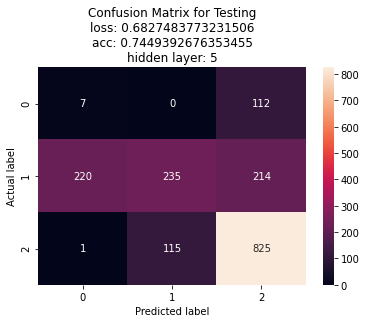

In [9]:
EPOCHS = 100
BATCH_SIZE = 200
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    verbose=1,
    patience=100,
    mode='max',
    restore_best_weights=True)
train(5)